In [72]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from XANES2020_code.general_tools import imagesc

In [49]:
# 20200927/run01
imgP_pix = np.array([[2162, 956],[1269, 925],[628,902],[602,1390],[1243,1411],[2077,1443]]) # pixel values
imgP_real =np.array([[0 ,76.5],[140 ,76.5],[240 ,76.5],[240 ,0.5],[140 ,0.5 ],[10, 0.5]]) # physical values (i.e. in cm)

# for 28th Aug
# imgP_pix2 = imgP_pix*1.0
# imgP_pix2[:,0] = imgP_pix[:,0]+30

# for 7th Sept
imgP_pix[:,0] = imgP_pix[:,0]+135

Nx_new = 4000
Ny_new = 960

# physical range covered by output image
xRange = 400
yRange = 106 
x0 = -50
y0 = -15

# physical resolution of output image
dx = xRange/Nx_new
dy = yRange/Ny_new
x_mm = x0 + np.linspace(0,Nx_new,num=Nx_new)*dx
y_mm = y0 + np.linspace(0,Ny_new,num=Ny_new)*dy

# Pixel values in new image
imgP_trans = (imgP_real-[x0,y0]) / [dx,dy]

H, status = cv2.findHomography(imgP_pix,imgP_trans)



/Users/streeter/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app
/Users/streeter/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


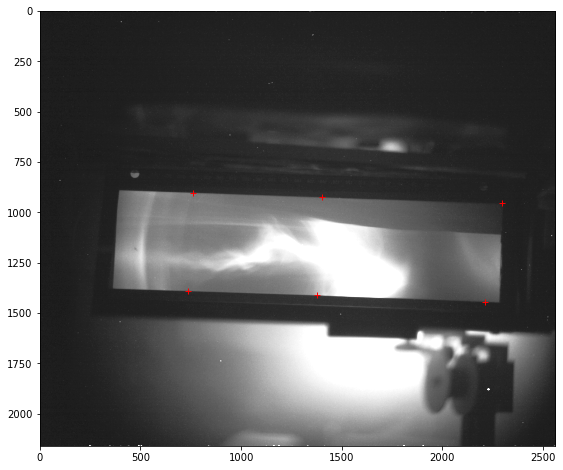

In [100]:
testFile = r'/Users/streeter/BoxSync/Experiments/GeminiXANES2020/calib/Espec_high/20200825/20200825_1837_lights.tiff'
testFile = r'/Users/streeter/BoxSync/Experiments/GeminiXANES2020/calib/Espec_high/20200828/20200828_Espec_high_ref.tif'
testFile = r'/Users/streeter/BoxSync/Experiments/GeminiXANES2020/MIRAGE/Espec_high/20200907/run01/Shot049.tif'
img = plt.imread(testFile)
(Ny,Nx) = np.shape(img)

# calculate pixel areas in original image
retval,H_inv = cv2.invert(H)
(X,Y) = np.meshgrid(x_mm,y_mm)
X_raw = cv2.warpPerspective(X, H_inv, (Nx,Ny))
Y_raw = cv2.warpPerspective(Y, H_inv, (Nx,Ny))
imgArea0 = np.gradient(X_raw,axis=1)*np.gradient(Y_raw,axis=0)

# calc transformed image
imgCountsPerArea = img/imgArea0
imgCountsPerArea[imgArea0==0] =0
imgCountsPerArea[np.isinf(imgCountsPerArea)] = 0
imgCountsPerArea[np.isnan(imgCountsPerArea)] = 0

im_out = cv2.warpPerspective(imgCountsPerArea, H, (Nx_new,Ny_new))*dx*dy

import pickle
def save_object(obj, filename):
    with open(filename, 'wb') as output:  # Overwrites any existing file.
        pickle.dump(obj, output, pickle.HIGHEST_PROTOCOL)
        


tForm = {  
    'description': 'Espec1 image transform',
    'H': H,
    'newImgSize':(Nx_new,Ny_new),
    'x_mm': x_mm,
    'y_mm': y_mm,
    'imgArea0': np.median(imgArea0[np.abs(X_raw**2+Y_raw**2)>0]),
    'imgArea1': dx*dy
}
tForm_filepath = 'Espec_high_transform_20200907.pkl'

save_object(tForm, tForm_filepath)
# Display image
plt.figure(figsize=(28,8))
plt.imshow(img,cmap='Greys_r',vmax=1000)
plt.plot(imgP_pix2[:,0],imgP_pix2[:,1],'r+')


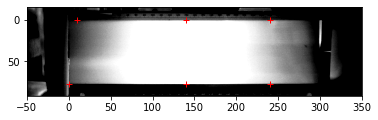

In [33]:
Espec_cal_filepath = r'Espec_high_disp_cal_20200829.mat'

from espec_processing import ESpec_high_proc
ep = ESpec_high_proc(tForm_filepath,Espec_cal_filepath,img_bkg=None,use_median=True,kernel_size=None )
im_out2 = ep.espec_warp(img)
plt.imshow(im_out2,extent= (np.min(x_mm), np.max(x_mm), np.max(y_mm), np.min(y_mm)),cmap='Greys_r',vmax=1000)
plt.plot(imgP_real[:,0],imgP_real[:,1],'r+')
plt.clim((0,200))


In [21]:
sys.path

['/Users/streeter/anaconda3/lib/python36.zip',
 '/Users/streeter/anaconda3/lib/python3.6',
 '/Users/streeter/anaconda3/lib/python3.6/lib-dynload',
 '',
 '/Users/streeter/.local/lib/python3.6/site-packages',
 '/Users/streeter/anaconda3/lib/python3.6/site-packages',
 '/Users/streeter/anaconda3/lib/python3.6/site-packages/aeosa',
 '/Users/streeter/anaconda3/lib/python3.6/site-packages/ta2_hrr_2019-0.0.0-py3.6.egg',
 '/Users/streeter/anaconda3/lib/python3.6/site-packages/fbpic-0.17.1-py3.6.egg',
 '/Users/streeter/BoxSync/Coding/Smilei-4.1',
 '/Users/streeter/anaconda3/lib/python3.6/site-packages/IPython/extensions',
 '/Users/streeter/.ipython',
 '.']

In [52]:
tForm.keys()

dict_keys(['description', 'H', 'newImgSize', 'x_mm', 'y_mm', 'imgArea0', 'imgArea1'])

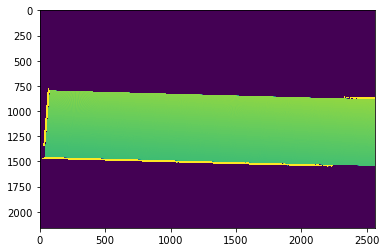

In [98]:
imagesc(imgArea0,vmin=0.022,vmax=0.025)

0.024292846543231158